# Random Stock Selection

## Fall 2022 | Instructor: Lin Tong | Student: Jihong Yu (A19639140)

In this example, we will randomly select 100 stocks from the database "rpsdata_rfs_cleaned_2000.csv" using the random seed 2021. We will do some data preparations for the subsequent procesures. 

## Data Preparation

In [1]:
import pandas as pd
df = pd.read_csv("rpsdata_rfs_cleaned_2000.csv")
df["datadate"]=pd.to_datetime(df["datadate"],format="%Y-%m-%d")
df["DATE"]=pd.to_datetime(df["DATE"],format="%Y-%m-%d")
df.head()

,permno,fyear,sic2,spi,mve_f,bm,ep,cashpr,dy,lev,...,baspread,std_dolvol,std_turn,ill,zerotrade,BETA,betasq,rsq1,pricedelay,idiovol
0,10001,1999,49,0.000000,20.99325,0.644588,0.075596,-24.025440,0.054541,1.416217,...,0.012581,1.078260,0.597444,4.016382e-06,3.818182e+00,0.062780,0.003941,-0.004141,1.905185,0.025807
1,10002,1998,60,0.000000,115.71000,0.509429,0.048181,-6.261051,0.021191,3.844966,...,0.035375,1.163444,0.172986,3.703263e-06,7.636364e+00,0.487761,0.237910,0.033295,-0.025434,0.050570
2,10009,1998,60,0.000000,50.61000,0.757597,0.095673,-28.390070,0.022782,10.058840,...,0.031896,1.046077,4.829668,2.535039e-07,2.881086e-08,0.299177,0.089507,0.022911,0.391768,0.035277
3,10012,1998,36,-0.101781,34.62894,0.130151,-0.105057,20.815490,0.000000,0.166681,...,0.112558,0.712583,23.904390,1.265005e-08,3.353590e-09,2.389729,5.710806,0.088599,-0.264245,0.145356
4,10016,1998,38,-0.003628,300.37280,0.183991,0.031607,2.865464,0.000000,0.692200,...,0.043094,1.005188,2.595967,8.944278e-08,3.859758e-08,0.619844,0.384207,0.093318,-0.096680,0.039299


Randomly sample stocks. 

In [2]:
df.head()

,permno,fyear,sic2,spi,mve_f,bm,ep,cashpr,dy,lev,...,baspread,std_dolvol,std_turn,ill,zerotrade,BETA,betasq,rsq1,pricedelay,idiovol
0,10001,1999,49,0.000000,20.99325,0.644588,0.075596,-24.025440,0.054541,1.416217,...,0.012581,1.078260,0.597444,4.016382e-06,3.818182e+00,0.062780,0.003941,-0.004141,1.905185,0.025807
1,10002,1998,60,0.000000,115.71000,0.509429,0.048181,-6.261051,0.021191,3.844966,...,0.035375,1.163444,0.172986,3.703263e-06,7.636364e+00,0.487761,0.237910,0.033295,-0.025434,0.050570
2,10009,1998,60,0.000000,50.61000,0.757597,0.095673,-28.390070,0.022782,10.058840,...,0.031896,1.046077,4.829668,2.535039e-07,2.881086e-08,0.299177,0.089507,0.022911,0.391768,0.035277
3,10012,1998,36,-0.101781,34.62894,0.130151,-0.105057,20.815490,0.000000,0.166681,...,0.112558,0.712583,23.904390,1.265005e-08,3.353590e-09,2.389729,5.710806,0.088599,-0.264245,0.145356
4,10016,1998,38,-0.003628,300.37280,0.183991,0.031607,2.865464,0.000000,0.692200,...,0.043094,1.005188,2.595967,8.944278e-08,3.859758e-08,0.619844,0.384207,0.093318,-0.096680,0.039299


In [3]:
import random
num_stock=100   #The number of stocks.
random.seed(2021)
stocklist =  random.sample(list(df.permno.unique()),num_stock) 
df = df[df.permno.isin(stocklist)].copy()
del df["datadate"]
del df["fyear"]
df.sort_values(by=["permno","DATE"],inplace=True)
df.reset_index(drop=True,inplace=True)

In [4]:
df.head()

,permno,sic2,spi,mve_f,bm,ep,cashpr,dy,lev,sp,...,baspread,std_dolvol,std_turn,ill,zerotrade,BETA,betasq,rsq1,pricedelay,idiovol
0,10325,56,-0.010241,83.51094,0.936201,0.024356,-17.92364,0.010083,2.94395,6.996401,...,0.069598,0.712721,3.341473,1.221359e-07,1.587679e-08,1.801611,3.245802,0.150400,0.177043,0.086112
1,10325,56,-0.010241,83.51094,0.936201,0.024356,-17.92364,0.010083,2.94395,6.996401,...,0.070863,0.803676,2.309144,2.448277e-07,2.721601e-08,1.846191,3.408423,0.151738,0.186343,0.088105
2,10325,56,-0.010241,83.51094,0.936201,0.024356,-17.92364,0.010083,2.94395,6.996401,...,0.063259,0.721935,4.526667,9.009622e-08,1.925423e-08,1.792151,3.211805,0.144251,0.250596,0.087058
3,10325,56,-0.010241,83.51094,0.936201,0.024356,-17.92364,0.010083,2.94395,6.996401,...,0.061893,0.781739,4.661429,7.737564e-08,1.564298e-08,1.818809,3.308067,0.155762,0.111497,0.087586
4,10325,56,-0.010241,83.51094,0.936201,0.024356,-17.92364,0.010083,2.94395,6.996401,...,0.055615,0.968370,2.274174,1.641843e-07,5.060460e-08,1.853151,3.434170,0.164967,0.159384,0.087659


When the data table contains many NaNs, we must be very careful in dropping NaNs in order to keep as many rows and columns as possible.

1. Remove all columns except the ones with less than 20% NaNs
2. Apply imputation to the remaining columns.

We can change 20% to other threshold to optimize our performance. The following code applies this procedure to a copy of **df**.

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
nanpercent = 0.2
dftemp = df.copy()
#Remove all columns except the ones with less than nanpercent NaNs
dftemp = dftemp[dftemp.columns[dftemp.isna().mean(axis=0)<nanpercent]]  
#Impute the remaining columns. 
dftemp.loc[:,dftemp.columns[dftemp.isna().sum(axis=0)>0]] = imputer.fit_transform(dftemp.loc[:,dftemp.columns[dftemp.isna().sum(axis=0)>0]]) 
print("Before")
print(df.shape)
print("After")
print(dftemp.shape)

Before
(8422, 145)
After
(8422, 121)


In [6]:
dftemp = dftemp.set_index('permno')

In [7]:
featurename=list(dftemp.columns)
featurename.remove("DATE")
featurename.remove("RET")
targetname="RET"

## Building Neural Network

In [8]:
from sklearn import preprocessing
import datetime
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import numpy as np
import random as python_random
#Set up the random seeds to reproduce results.
import statistics
import matplotlib.pyplot as plt

In [9]:
def data_dividor(test_start_date, test_end_date):
    """divide the data based on the target_date"""
    train_x = dftemp[dftemp.DATE<test_start_date].loc[:,featurename]
    train_y = dftemp[dftemp.DATE<test_start_date].loc[:,targetname]
    test_x = dftemp[(dftemp.DATE>=test_start_date) & (dftemp.DATE<test_end_date)].loc[:,featurename]
    test_y = dftemp[(dftemp.DATE>=test_start_date) & (dftemp.DATE<test_end_date)].loc[:,targetname]
    
    # scaling the data from 0 to 1
    min_max_scaler = preprocessing.MinMaxScaler()
    train_x = min_max_scaler.fit_transform(train_x)
    test_x = min_max_scaler.transform(test_x)
    
    # returns training and test sets
    return train_x, train_y, test_x, test_y

In [10]:
def nn_builder(train_x, train_y, test_x):
    """Building the neural network model to predict stock prices"""
    keras.backend.clear_session()  #Clean the session to reset the model/layer ID
    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(128, activation='sigmoid',input_shape=(train_x.shape[1],)),
      tf.keras.layers.Dense(16, activation='sigmoid'),
      tf.keras.layers.Dense(1, activation='linear')
    ])
    # model.summary()

    # Set the concrete random numbers
    os.environ['PYTHONHASHSEED']=str(0)
    np.random.seed(2021)
    python_random.seed(2021)
    tf.random.set_seed(2021)

    #Define an optimizer, for example, Adam
    opt = keras.optimizers.Adam(learning_rate=0.01)

    #Compile the model
    model.compile(optimizer=opt,   #Set optimizer='adam' if you want to use default learning rate.
                  loss='mean_squared_error',
                  metrics='mean_squared_error')

    #Train and record how the performance metrics changes during training. 
    model.fit(train_x, train_y, 
                    verbose=0,
                    batch_size=1000, 
                    epochs=50
                   )
    
    forecaster= model.predict(test_x)
    return forecaster

In [11]:
start_date = "2010-01-01"
terminal_date = "2020-01-01"
s_date = pd.to_datetime(start_date)
e_date = pd.to_datetime(terminal_date)
iter_num = int(relativedelta(e_date, s_date).years)

In [13]:
high_mean = []
high_stv = []
low_mean = []
low_stv = []
temp_end = s_date

for i in range(1,iter_num+1):
    if temp_end == e_date:
        temp_end = s_date
        break
    if i == 1:
        temp_end = s_date + relativedelta(years=i)
        print("="*100)
        print("NN model construction")
        print("start date: ",s_date)
        print("end date: ",temp_end)
        
        train_x, train_y, test_x, test_y = data_dividor(s_date, temp_end)
        dftemp.loc[(dftemp.DATE>=s_date) & (dftemp.DATE<temp_end),"Signal"] = nn_builder(train_x, train_y, test_x)
        
        for j in range(1,13):
            if j == 1:
                temp_month_start = s_date
                temp_month_end = s_date + relativedelta(months = j)
                print("-"*100)
                print("selecting monthly highest and lowest")
                print("start date: ",temp_month_start)
                print("end date: ",temp_month_end)
                
                highest_df = dftemp.loc[(dftemp.DATE>=temp_month_start) & (dftemp.DATE<temp_month_end)].nlargest(10, "Signal")
                lowest_df = dftemp.loc[(dftemp.DATE>=temp_month_start) & (dftemp.DATE<temp_month_end)].nsmallest(10, "Signal")

                high_mean.append(statistics.mean(highest_df.RET))
                high_stv.append(statistics.stdev(highest_df.RET))        
                low_mean.append(statistics.mean(lowest_df.RET))
                low_stv.append(statistics.stdev(lowest_df.RET))
            
            else:
                temp_month_start = temp_month_end
                temp_month_end = temp_month_start + relativedelta(months = 1)
                print("-"*100)
                print("selecting monthly highest and lowest")
                print("start date: ",temp_month_start)
                print("end date: ",temp_month_end)
                
                highest_df = dftemp.loc[(dftemp.DATE>=temp_month_start) & (dftemp.DATE<temp_month_end)].nlargest(10, "Signal")
                lowest_df = dftemp.loc[(dftemp.DATE>=temp_month_start) & (dftemp.DATE<temp_month_end)].nsmallest(10, "Signal")

                high_mean.append(statistics.mean(highest_df.RET))
                high_stv.append(statistics.stdev(highest_df.RET))
                low_mean.append(statistics.mean(lowest_df.RET))
                low_stv.append(statistics.stdev(lowest_df.RET))
                
            
    else:
        temp_start = temp_end
        temp_end = temp_start + relativedelta(years=1)
        print("="*100)
        print("NN model construction")
        print("start date: ",temp_start)
        print("end date: ",temp_end)
        train_x, train_y, test_x, test_y = data_dividor(temp_start, temp_end)
        dftemp.loc[(dftemp.DATE>=temp_start) & (dftemp.DATE<temp_end),"Signal"] = nn_builder(train_x, train_y, test_x)
        
        for j in range(1,13):
            if j == 1:
                temp_month_start = temp_start
                temp_month_end = temp_start + relativedelta(months = j)
                print("-"*100)
                print("selecting monthly highest and lowest")
                print("start date: ",temp_month_start)
                print("end date: ",temp_month_end)
                
                highest_df = dftemp.loc[(dftemp.DATE>=temp_month_start) & (dftemp.DATE<temp_month_end)].nlargest(10, "Signal")
                lowest_df = dftemp.loc[(dftemp.DATE>=temp_month_start) & (dftemp.DATE<temp_month_end)].nsmallest(10, "Signal")

                high_mean.append(statistics.mean(highest_df.RET))
                high_stv.append(statistics.stdev(highest_df.RET))        
                low_mean.append(statistics.mean(lowest_df.RET))
                low_stv.append(statistics.stdev(lowest_df.RET))
                
            else:
                temp_month_start = temp_month_end
                temp_month_end = temp_month_start + relativedelta(months = 1)
                print("-"*100)
                print("selecting monthly highest and lowest")
                print("start date: ",temp_month_start)
                print("end date: ",temp_month_end)
                
                highest_df = dftemp.loc[(dftemp.DATE>=temp_month_start) & (dftemp.DATE<temp_month_end)].nlargest(10, "Signal")
                lowest_df = dftemp.loc[(dftemp.DATE>=temp_month_start) & (dftemp.DATE<temp_month_end)].nsmallest(10, "Signal")

                high_mean.append(statistics.mean(highest_df.RET))
                high_stv.append(statistics.stdev(highest_df.RET))
                low_mean.append(statistics.mean(lowest_df.RET))
                low_stv.append(statistics.stdev(lowest_df.RET))

NN model construction
start date:  2010-01-01 00:00:00
end date:  2011-01-01 00:00:00
11/11 [==============================] - 0s 850us/step
----------------------------------------------------------------------------------------------------
selecting monthly highest and lowest
start date:  2010-01-01 00:00:00
end date:  2010-02-01 00:00:00
----------------------------------------------------------------------------------------------------
selecting monthly highest and lowest
start date:  2010-02-01 00:00:00
end date:  2010-03-01 00:00:00
----------------------------------------------------------------------------------------------------
selecting monthly highest and lowest
start date:  2010-03-01 00:00:00
end date:  2010-04-01 00:00:00
----------------------------------------------------------------------------------------------------
selecting monthly highest and lowest
start date:  2010-04-01 00:00:00
end date:  2010-05-01 00:00:00
---------------------------------------------------

In [14]:
full_dates = dftemp.loc[(dftemp.DATE>="2010-01-01") & (dftemp.DATE<"2020-01-01")].DATE
full_dates = full_dates.to_numpy()
full_dates = np.unique(full_dates)
print(len(full_dates))

120


In [15]:
high_m = pd.DataFrame(high_mean, full_dates)
high_s = pd.DataFrame(high_stv, full_dates)
low_m = pd.DataFrame(low_mean, full_dates)
low_s = pd.DataFrame(low_stv, full_dates)

high_m.to_csv("long_portfolio_ret.csv")
high_s.to_csv("long_portfolio_stv.csv")
low_m.to_csv("short_portfolio_ret.csv")
low_s.to_csv("short_portfolio_stv.csv")

In [16]:
def cumulative_ret(returns):
    plus_one = []
    cum_ret = []
    
    for i in returns:
        plus_one.append(i+1)
    
    for idx, i in enumerate(plus_one):
        if idx == 0:
            cum_ret.append(i)
        else:
            cum_ret.append(cum_ret[idx-1]*i)
    
    return cum_ret

In [17]:
cum_long = cumulative_ret(high_mean)
cum_short = cumulative_ret(low_mean)

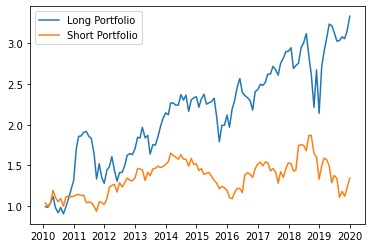

In [18]:
plt.plot(full_dates, cum_long, label = "Long Portfolio")
plt.plot(full_dates, cum_short, label = "Short Portfolio")
plt.legend()
plt.show()

In [19]:
dftemp.to_csv("full_dataset.csv")

In [53]:
long_port = pd.concat([high_m,high_s], axis =1)
long_port.columns = ["l_mean","l_stv"]

short_port = pd.concat([low_m,low_s], axis =1)
short_port.columns = ["s_mean","s_stv"]

cum_l = pd.DataFrame(cum_long, full_dates)
cum_l.columns = ["l_cum_ret"]
cum_s = pd.DataFrame(cum_short, full_dates)
cum_s.columns = ["s_cum_ret"]

In [54]:
fulldeck = pd.concat([long_port,cum_l,short_port,cum_s], axis =1)
fulldeck

,l_mean,l_stv,l_cum_ret,s_mean,s_stv,s_cum_ret
2010-01-29,-0.004422,0.085028,0.995578,0.039711,0.214839,1.039711
2010-02-26,-0.009013,0.097267,0.986605,-0.038077,0.092174,1.000122
2010-03-31,0.055456,0.078477,1.041318,0.036467,0.106512,1.036594
2010-04-30,0.073332,0.098117,1.117680,0.153541,0.231966,1.195753
2010-05-28,-0.119772,0.084221,0.983813,-0.074951,0.099705,1.106130
...,...,...,...,...,...,...
2019-08-30,0.002401,0.174070,3.031183,-0.172382,0.154210,1.109405
2019-09-30,0.015143,0.069278,3.077083,0.066460,0.054727,1.183136
2019-10-31,-0.007247,0.124325,3.054783,-0.051360,0.105104,1.122370
2019-11-29,0.030594,0.164779,3.148242,0.092424,0.181769,1.226104


In [55]:
fulldeck.to_csv("portfolio_info.csv")